# Diabetic Retinopathy Detection
Predict whether diabetic retinopathy is referenceable (NPDR {Moderate or beyond} or DPR with
NDE) or not. Do not worry if you cannot differentiate the images with your eyes (it requires
trained professional and a well-trained neural network to do it). Note that the class imbalance
has to be accounted for (will be appropriately rewarded). This is a binary classification problem.

## Pre-Processing

In [1]:
# imports
import os
from pathlib import Path
import cv2 #opencv-python
from matplotlib import pyplot as plt
import pywt

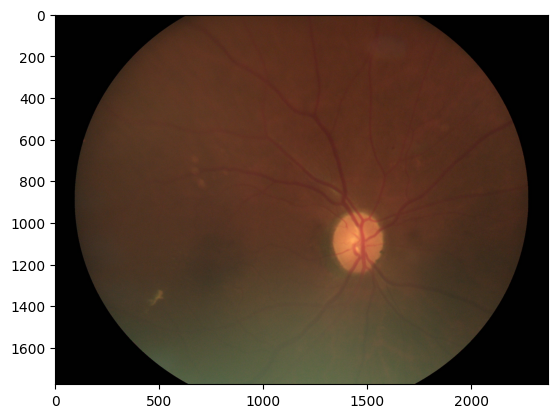

In [2]:
# display sample image
data_dir = os.path.join(os.getcwd(), "../data/SAUNAR/")
img_dirs = [data_dir + name for name in os.listdir(data_dir) if os.path.isdir(data_dir + name)]
sample_img = os.path.join(img_dirs[0],os.listdir(img_dirs[0])[0])
img = cv2.imread(sample_img)
img_color_fix = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(img_color_fix)
plt.show()
        



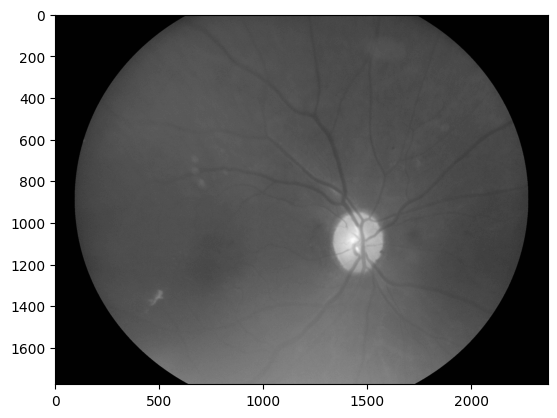

In [3]:
# apply grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgplot = plt.imshow(img_gray, cmap="gray")
plt.show()

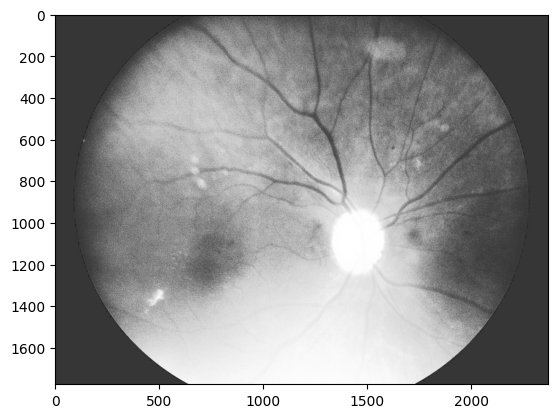

In [4]:
# apply high contrast
img_hcontrast = cv2.equalizeHist(img_gray)
imgplot = plt.imshow(img_hcontrast, cmap="gray")
plt.show()

In [18]:
# attempt at black and white conversion for feature isolation, don't like
# (thresh, blackAndWhiteImage) = cv2.threshold(img_hcontrast, 120, 255, cv2.THRESH_BINARY)
# imgplot = plt.imshow(blackAndWhiteImage, cmap="gray")
# plt.show()

In [5]:
# # apply discrete wavelet transform
# # Load image
# original = img_hcontrast


# # Wavelet transform of image, and plot approximation and details
# titles = ['Approximation', ' Horizontal detail',
#           'Vertical detail', 'Diagonal detail']
# coeffs2 = pywt.dwt2(original, 'bior1.3')
# LL, (LH, HL, HH) = coeffs2
# fig = plt.figure(figsize=(12, 3))
# for i, a in enumerate([LL, LH, HL, HH]):
#     ax = fig.add_subplot(1, 4, i + 1)
#     ax.imshow(a, interpolation="nearest", cmap='gray')
#     ax.set_title(titles[i], fontsize=10)
#     ax.set_xticks([])
#     ax.set_yticks([])

# fig.tight_layout()
# plt.show()

In [6]:
# image = cv2.imread(sample_img)
# image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))
# bg=cv2.morphologyEx(image, cv2.MORPH_DILATE, se)
# out_gray=cv2.divide(image, bg, scale=255)
# out_binary=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU )[1] 

# imgplot = plt.imshow(out_gray, cmap="gray")
# plt.show()

# imgplot = plt.imshow(out_binary, cmap="gray")
# plt.show()

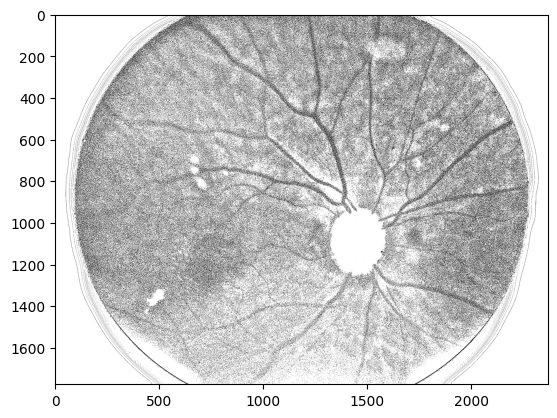

In [5]:
import cv2
import numpy as np

# load image
img = img_hcontrast
# blur
blur = cv2.GaussianBlur(img, (0,0), sigmaX=33, sigmaY=33)

# divide
divide = cv2.divide(img, blur, scale=255)

# otsu threshold
thresh = cv2.threshold(divide, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
th2 = cv2.adaptiveThreshold(divide,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
#KEEP
th3 = cv2.adaptiveThreshold(divide,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
m2 = cv2.morphologyEx(th2, cv2.MORPH_CLOSE, kernel)
m3 = cv2.morphologyEx(th3, cv2.MORPH_CLOSE, kernel)


# display it
# cplot = plt.imshow(thresh, cmap="gray")
# plt.show()
# cplot = plt.imshow(th2, cmap="gray")
# plt.show()
cplot = plt.imshow(th3, cmap="gray")
plt.show()

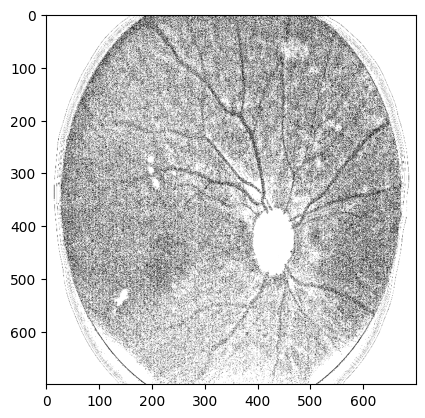

In [18]:
small = cv2.resize(th3, (700,700))
cplot = plt.imshow(small, cmap="gray")
plt.show()

In [17]:
# iterate through all images in dataset
data_dir = os.path.join(os.getcwd(), "../data/SAUNAR/")
img_dirs = [name for name in os.listdir(data_dir) if os.path.isdir(data_dir + name)]
ref_count = 0
nonref_count = 0
other_count = 0
for d in img_dirs:
    # process and store nonref images from the 01 and 02 folders
    if d[:2] == "01" or d[:2] == "02":
        for i in os.listdir(data_dir + d):
            nonref_count += 1
    # process and store non-classifiable images from 00 and 10 folders
    elif d[:2] == "00" or d[:2] == "10":
        for i in os.listdir(data_dir + d):
            other_count += 1
    # process and store ref images from all other folders
    else:
        for i in os.listdir(data_dir + d):
            ref_count += 1
print(f"REF count: {ref_count}")
print(f"NONREF count: {nonref_count}")
print(f"other count: {other_count}")

REF count: 703
NONREF count: 3727
other count: 190


have an extremely imbalanced class count

In [19]:
# Preprocess(img: string): given filepath img to an image, returns the preprocessed cv2 image object
    # throws invalidArgument error if img is not a valid path
def Preprocess(img):
    try:
        i = cv2.imread(img)
        img_gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
        img_hcontrast = cv2.equalizeHist(img_gray)
        blur = cv2.GaussianBlur(img_hcontrast, (0,0), sigmaX=33, sigmaY=33)
        divide = cv2.divide(img_hcontrast, blur, scale=255)
        th3 = cv2.adaptiveThreshold(divide,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
        small = cv2.resize(th3, (700,700))
        return small
    except:
        raise ValueError(f"input {img} is not a valid filepath.")

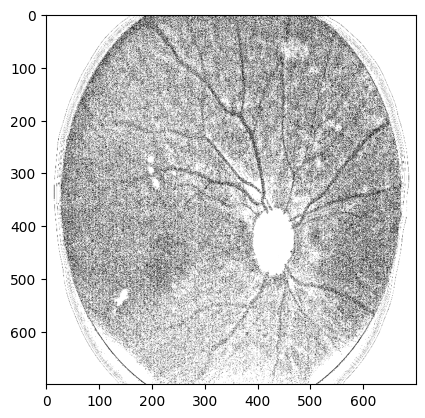

In [20]:
data_dir = os.path.join(os.getcwd(), "../data/SAUNAR/")
img_dirs = [data_dir + name for name in os.listdir(data_dir) if os.path.isdir(data_dir + name)]
sample_img = os.path.join(img_dirs[0],os.listdir(img_dirs[0])[0])
imgplot = plt.imshow(Preprocess(sample_img), cmap="gray")
plt.show()